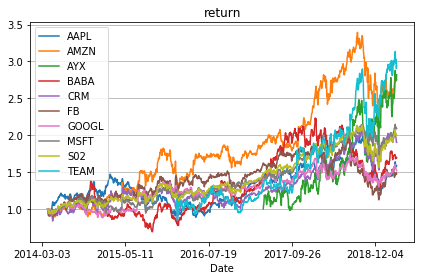

In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

#------------------------------
#-- 0. Read in 
#------------------------------
df = pd.read_csv('M02 M1 9 Stocks.csv')

#----------------------------------------
#-- 1. calc return1, pivot AID to columns
#----------------------------------------
df['return1'] = df['mv']/df['cost']
pivoted = df.pivot(index='Date', columns='AID', values='return1')

flattened = pd.DataFrame(pivoted.to_records())
cols = flattened.columns.values.tolist() 
cols.remove('Date')

#-------------------------------------------------
#-- 2. plot return1 
#-------------------------------------------------
def get_chart(df, cols):
    
    x1 = df['Date']
    y1 = df[cols]

    fig, ax1 = plt.subplots()

    #-- plot
    ax1.plot(x1, y1) # 

    #-- x1(date)
    plt.xticks(x1) # x1(Date)
    ax1.set_xlabel('Date')

    #-- set max xaxis n ticks
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    
    #-- plot title
    plt.title('return')
    
    #-- plot legend
    plt.legend(cols)
    
    #-- horizontal grid
    ax1.yaxis.grid(True)

    #-- plot tight_layout, show
    plt.tight_layout()
    plt.show()
    
get_chart(df=flattened, cols=cols)


#------------------------------
#-- 3. Output to csv
#------------------------------
# Key: Date
flattened.to_csv('V01 M1 9 Stocks.csv',index=False) 

In [7]:
flattened.tail()

,Date,AAPL,AMZN,AYX,BABA,CRM,FB,GOOGL,MSFT,S02,TEAM
1273,2019-03-22,1.604924,2.740963,2.755273,1.680380,1.980855,1.463075,1.565675,2.091058,2.013190,2.981967
1274,2019-03-25,1.585519,2.755703,2.792920,1.704310,1.973251,1.480435,1.552360,2.101955,2.018118,2.982782
1275,2019-03-26,1.569137,2.770458,2.738803,1.697732,1.955098,1.492810,1.542585,2.106421,2.017006,3.028667
1276,2019-03-27,1.583250,2.742408,2.758970,1.687721,1.902602,1.476696,1.527248,2.086056,1.991591,2.904859
1277,2019-03-28,1.585351,2.754398,2.818466,1.694395,1.903338,1.473847,1.519806,2.088914,1.999501,2.944771
